In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [675]:
df=pd.read_csv("titanic-training-data.csv")

In [676]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [677]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [678]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [679]:
df.shape

(891, 12)

 missing values count is too large is not a good idea to consider cabin column

In [680]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

age is mean and median   

embarked with mode

In [681]:
#replacing null values in numerical columns using median
median1=df["Age"].median()

In [682]:
median1

28.0

In [683]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [684]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [685]:
 mode1=df["Embarked"].mode().values[0]

In [686]:
mode1

'S'

In [687]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [688]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# drop insignificant columns

In [689]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [690]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [691]:
#checking duplicates
duplicate=df.duplicated()
print(duplicate.sum())

116


In [692]:
###missing values using boxplot

<Axes: xlabel='Age'>

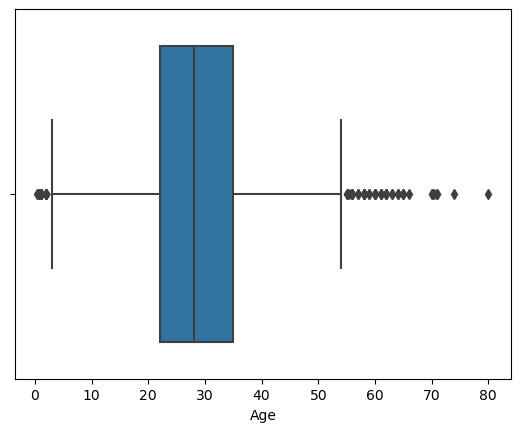

In [693]:
sns.boxplot(x="Age",data=df)

In [694]:
def remove_outlier(col):
    sorted(col)
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lwr_range =q1-(1.5*IQR)
    upr_range =q3+(1.5*IQR)
    return lwr_range,upr_range

In [695]:
lowAge,uppAge=remove_outlier(df["Age"])
df["Age"]=np.where(df["Age"]>uppAge,uppAge,df["Age"])
df["Age"]=np.where(df["Age"]<lowAge,lowAge,df["Age"])

<Axes: xlabel='Age'>

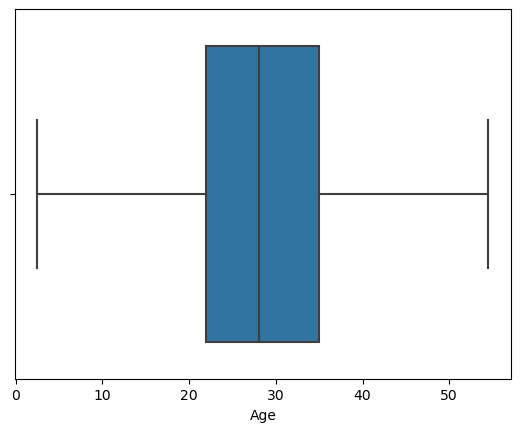

In [696]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='Fare'>

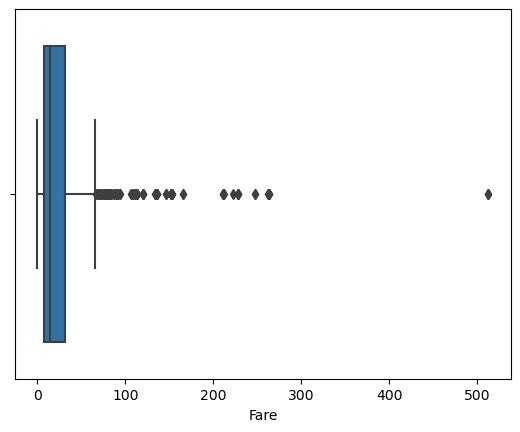

In [697]:
sns.boxplot(x="Fare",data=df)

In [698]:
lowAge,uppAge=remove_outlier(df["Fare"])
df["Fare"]=np.where(df["Fare"]>uppAge,uppAge,df["Fare"])
df["Fare"]=np.where(df["Fare"]<lowAge,lowAge,df["Fare"])

<Axes: xlabel='Fare'>

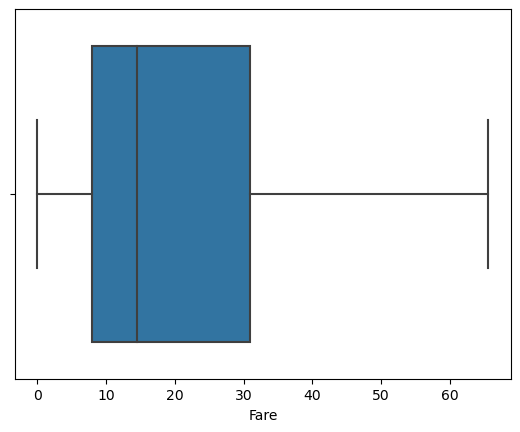

In [699]:
sns.boxplot(x="Fare",data=df)

# Encoding

In [700]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [701]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [702]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [703]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,65.6344,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


# dataset -2 (pima diabetes dataset)

In [704]:
df=pd.read_csv("pima-indians-diabetes-2.csv")

In [705]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [706]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [707]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [708]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='age'>

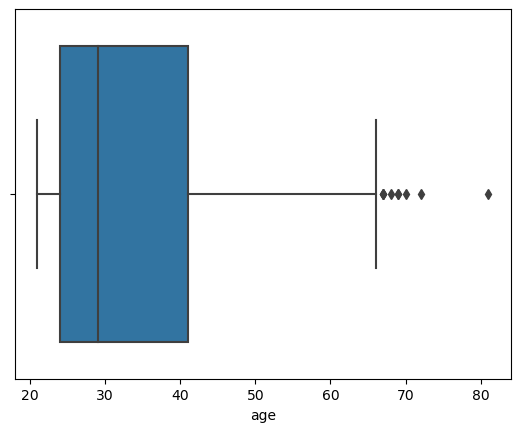

In [709]:
sns.boxplot(x="age",data=df)

In [710]:
lowAge,uppAge=remove_outlier(df["age"])
df["age"]=np.where(df["age"]>uppAge,uppAge,df["age"])
df["age"]=np.where(df["age"]<lowAge,lowAge,df["age"])

<Axes: xlabel='age'>

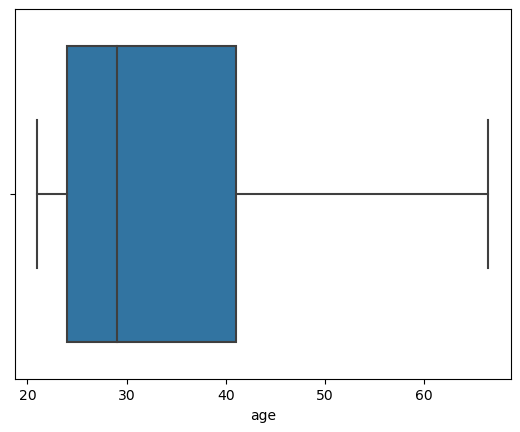

In [711]:
sns.boxplot(x="age",data=df)

<Axes: xlabel='skin'>

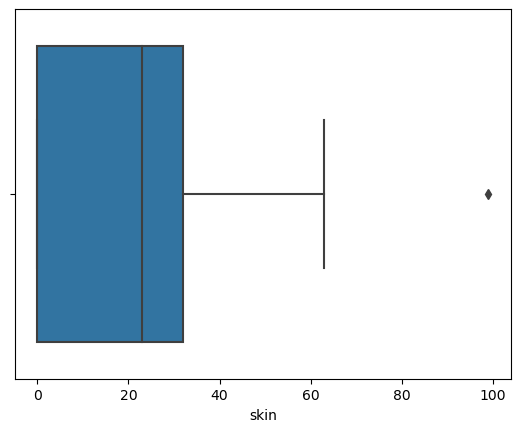

In [712]:
sns.boxplot(x="skin",data=df)

In [713]:
lowAge,uppAge=remove_outlier(df["skin"])
df["skin"]=np.where(df["skin"]>uppAge,uppAge,df["skin"])
df["skin"]=np.where(df["skin"]<lowAge,lowAge,df["skin"])

<Axes: xlabel='skin'>

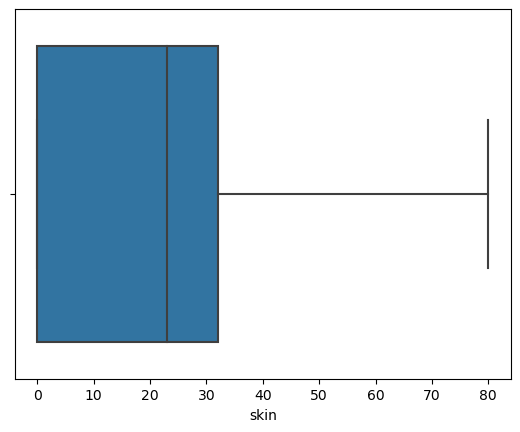

In [714]:
sns.boxplot(x="skin",data=df)

<Axes: xlabel='Preg'>

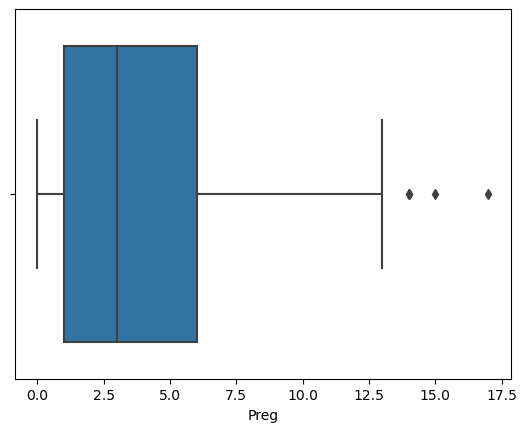

In [715]:
sns.boxplot(x="Preg",data=df)

In [716]:
lowAge,uppAge=remove_outlier(df["Preg"])
df["Preg"]=np.where(df["Preg"]>uppAge,uppAge,df["Preg"])
df["Preg"]=np.where(df["Preg"]<lowAge,lowAge,df["Preg"])

<Axes: xlabel='Preg'>

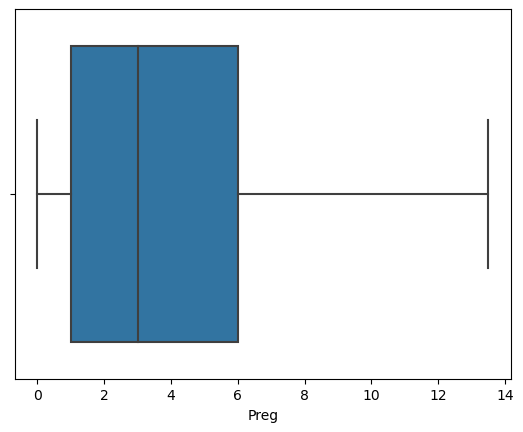

In [717]:
sns.boxplot(x="Preg",data=df)

<Axes: xlabel='Plas'>

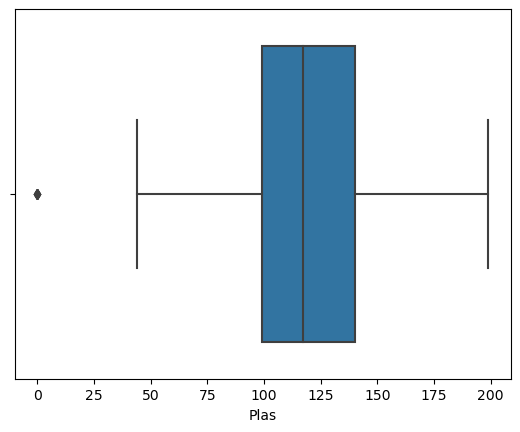

In [718]:
sns.boxplot(x="Plas",data=df)

In [719]:
lowAge,uppAge=remove_outlier(df["Plas"])
df["Plas"]=np.where(df["Plas"]>uppAge,uppAge,df["Plas"])
df["Plas"]=np.where(df["Plas"]<lowAge,lowAge,df["Plas"])

<Axes: xlabel='Plas'>

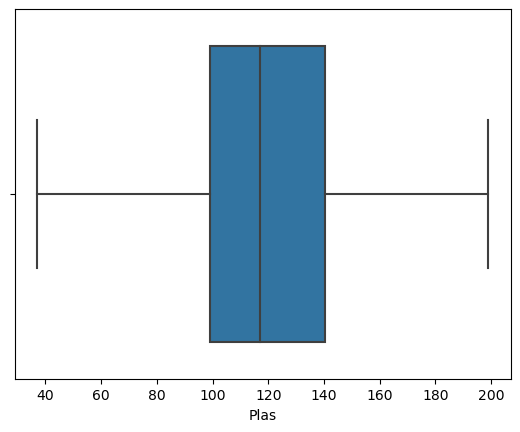

In [720]:
sns.boxplot(x="Plas",data=df)

<Axes: xlabel='Pres'>

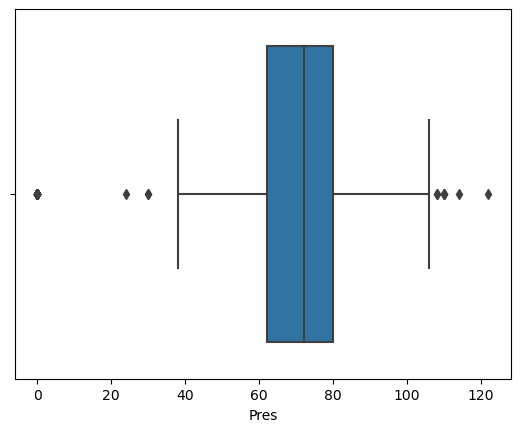

In [721]:
sns.boxplot(x="Pres",data=df)

In [722]:
lowAge,uppAge=remove_outlier(df["Pres"])
df["Pres"]=np.where(df["Pres"]>uppAge,uppAge,df["Pres"])
df["Pres"]=np.where(df["Pres"]<lowAge,lowAge,df["Pres"])

<Axes: xlabel='Pres'>

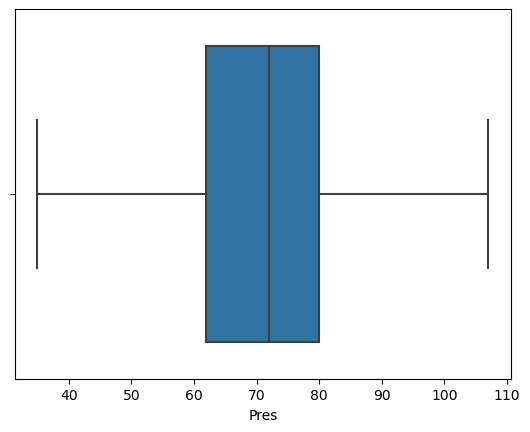

In [723]:
sns.boxplot(x="Pres",data=df)

<Axes: xlabel='test'>

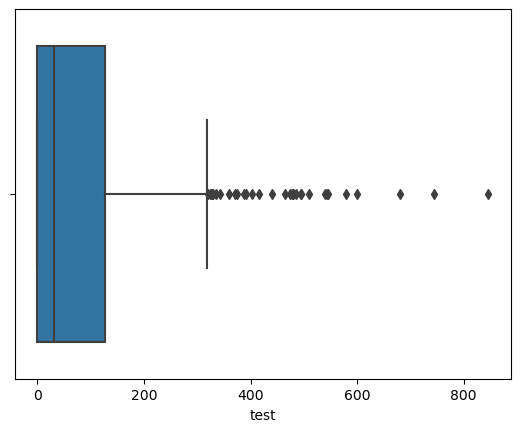

In [724]:
sns.boxplot(x="test",data=df)

In [725]:
lowAge,uppAge=remove_outlier(df["test"])
df["test"]=np.where(df["test"]>uppAge,uppAge,df["test"])
df["test"]=np.where(df["test"]<lowAge,lowAge,df["test"])

<Axes: xlabel='test'>

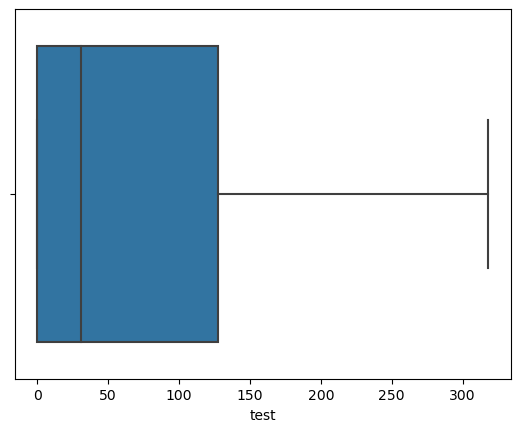

In [726]:
sns.boxplot(x="test",data=df)

In [727]:
lowAge,uppAge=remove_outlier(df["mass"])
df["mass"]=np.where(df["mass"]>uppAge,uppAge,df["mass"])
df["mass"]=np.where(df["mass"]<lowAge,lowAge,df["mass"])

<Axes: xlabel='mass'>

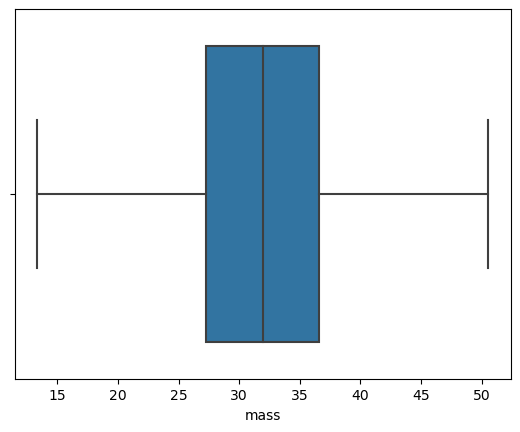

In [728]:
sns.boxplot(x="mass",data=df)

# encoding

In [729]:
df.dtypes

Preg     float64
Plas     float64
Pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age      float64
class      int64
dtype: object

In [730]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [731]:
## no need of encoding because they are in int datatype only

# Dataset --3 (auto mpg)

In [732]:
df=pd.read_csv("auto-mpg.csv")

In [733]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [734]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [735]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [736]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [737]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [738]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='mpg'>

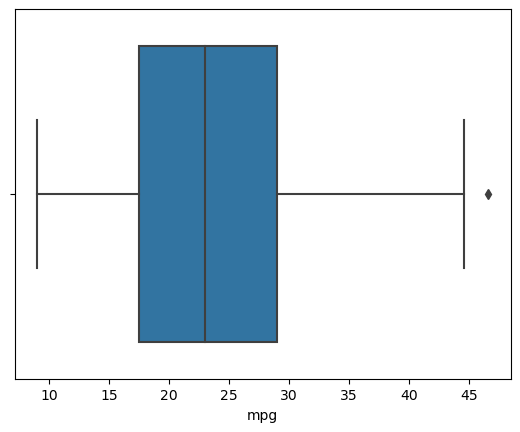

In [739]:
sns.boxplot(x="mpg",data=df)

In [740]:
lowAge,uppAge=remove_outlier(df["mpg"])
df["mpg"]=np.where(df["mpg"]>uppAge,uppAge,df["mpg"])
df["mpg"]=np.where(df["mpg"]<lowAge,lowAge,df["mpg"])

<Axes: xlabel='mpg'>

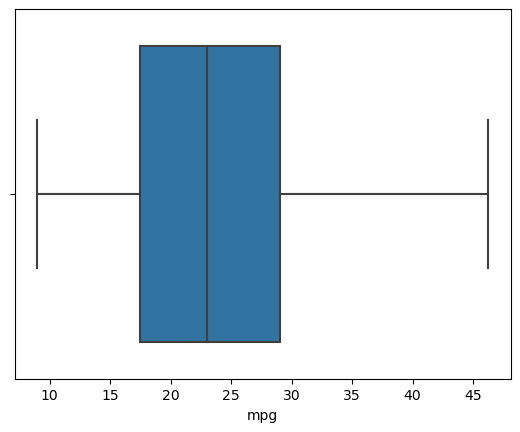

In [741]:
sns.boxplot(x="mpg",data=df)

<Axes: xlabel='cylinders'>

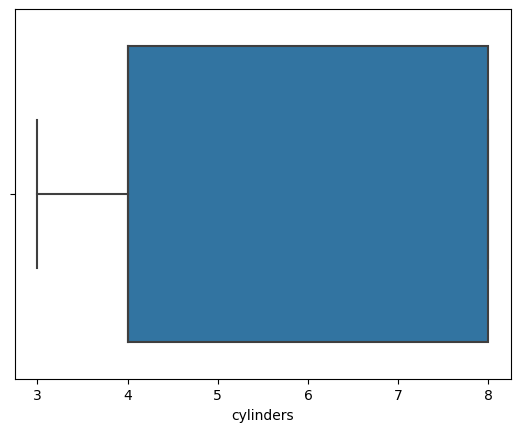

In [742]:
sns.boxplot(x="cylinders",data=df)

<Axes: xlabel='displacement'>

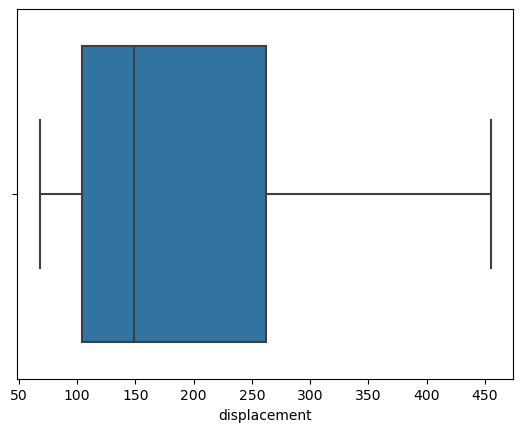

In [743]:
sns.boxplot(x="displacement",data=df)

<Axes: xlabel='weight'>

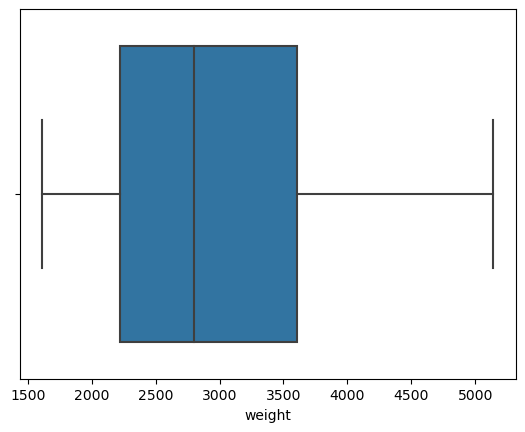

In [744]:
sns.boxplot(x="weight",data=df)

<Axes: xlabel='acceleration'>

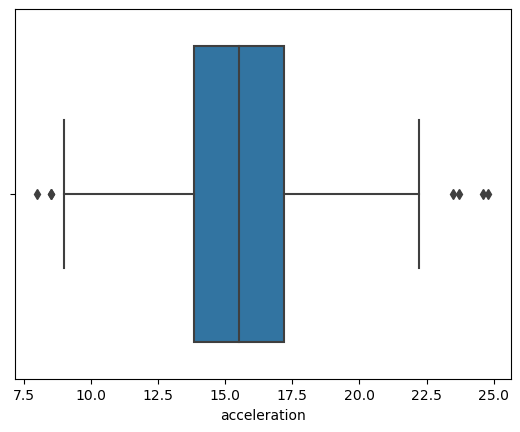

In [745]:
sns.boxplot(x="acceleration",data=df)

In [746]:
lowAge,uppAge=remove_outlier(df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]>uppAge,uppAge,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<lowAge,lowAge,df["acceleration"])

<Axes: xlabel='acceleration'>

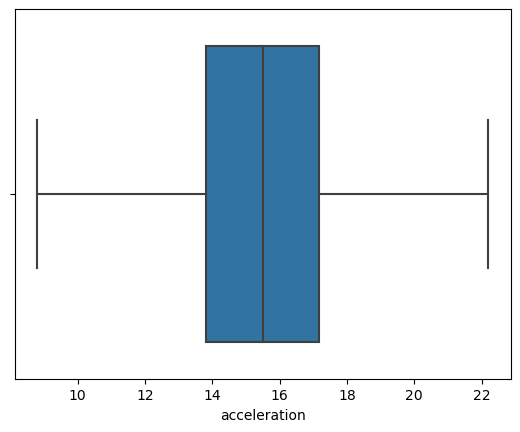

In [747]:
sns.boxplot(x="acceleration",data=df)

<Axes: xlabel='model year'>

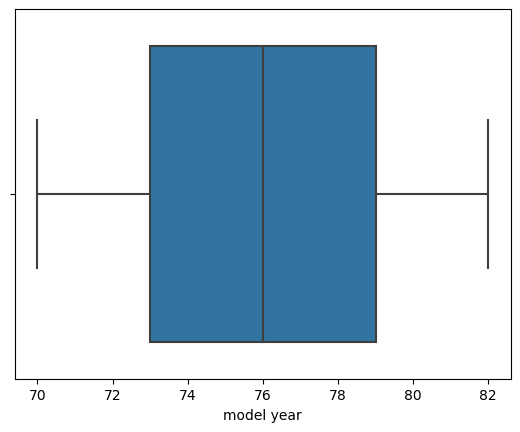

In [748]:
sns.boxplot(x="model year",data=df)

<Axes: xlabel='origin'>

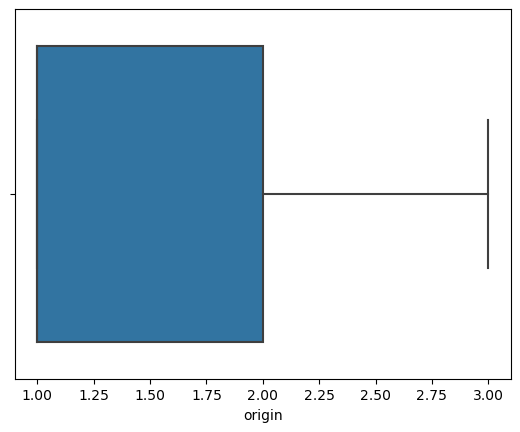

In [749]:
sns.boxplot(x="origin",data=df)

#missing values


In [750]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

they are hidden missing values in horsepower column

In [751]:
df["horsepower"]=df["horsepower"].replace(to_replace ='?' ,value =np.nan)

In [752]:
median1=df["horsepower"].median()

In [753]:
median1

93.5

In [754]:
df["horsepower"]=df["horsepower"].replace(np.nan,median1)
df["horsepower"]=df["horsepower"].astype(float)

In [755]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [756]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [757]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<Axes: xlabel='horsepower'>

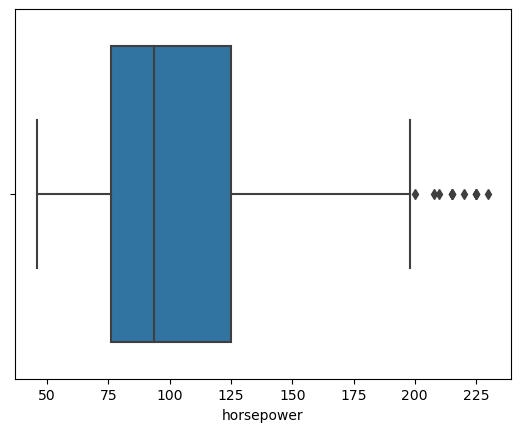

In [759]:
sns.boxplot(x="horsepower",data=df)

In [760]:
lowAge,uppAge=remove_outlier(df["horsepower"])
df["horsepower"]=np.where(df["horsepower"]>uppAge,uppAge,df["horsepower"])
df["horsepower"]=np.where(df["horsepower"]<lowAge,lowAge,df["horsepower"])

<Axes: xlabel='horsepower'>

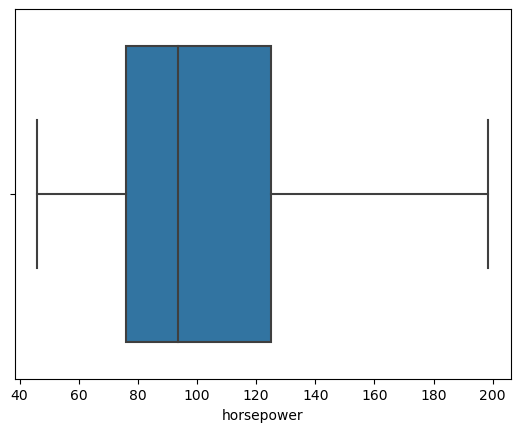

In [761]:
sns.boxplot(x="horsepower",data=df)

In [762]:
duplicate=df.duplicated()
print(duplicate.sum())

0
